In [1]:
# preamble to be able to run notebooks in Jupyter and Colab
try:
    from google.colab import drive
    import sys
    
    drive.mount('/content/drive')
    notes_home = "/content/drive/Shared drives/CSC310/notes/"
    user_home = "/content/drive/My Drive/"
    
    sys.path.insert(1,notes_home) # let the notebook access the notes folder

except ModuleNotFoundError:
    notes_home = "" # running native Jupyter environment -- notes home is the same as the notebook
    user_home = ""  # under Jupyter we assume the user directory is the same as the notebook

# Unsupervised Learning

Unsupervised machine learning is the machine learning task of inferring a function to describe hidden structure from *unlabeled* data:

> a concept, classification or categorization is not included in the observations, that is, there is no target variable!


# The k-Means Algorithm


The k-means algorithm searches for a pre-determined number of clusters within an unlabeled, numeric dataset – the k in the name.

It accomplishes this using a simple conception of what the optimal clustering looks like:

* The "cluster center" is the arithmetic mean of all the points belonging to the cluster – the  mean in the name
* Each point is closer to its own cluster center than to other cluster centers.

Those two assumptions are the basis of the k-means model. 

Source: [Wikepedia](https://en.wikipedia.org/wiki/K-means_clustering)

## Visualization of k-Means

In [2]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

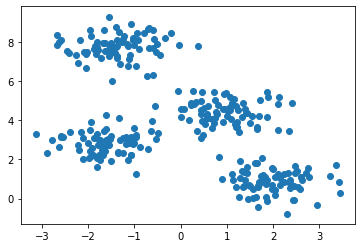

In [3]:
# generate blobs with k = 4
X, y = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)
plt.scatter(X[:,0], X[:,1]);
plt.show()

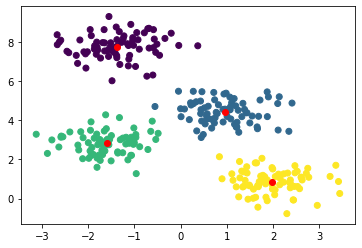

In [4]:
# build a k-means model with k=4
model = KMeans(n_clusters=4)
model.fit(X)
y_kmeans = model.predict(X)

# plot clusters by color according to cluster model
plt.scatter(X[:,0], X[:,1], c=y_kmeans)

# plot centers
centers = model.cluster_centers_
plt.scatter(centers[:,0], centers[:,1], c='red')

plt.show()

## A More Detailed Look at k-Means: Expectation Maximization

The expectation–maximization approach here consists of the following procedure:

* Guess some cluster centers
* Repeat until converged
    1. E-Step: assign points to the nearest cluster center
    1. M-Step: set the cluster centers to the mean

Here the "E-step" or "Expectation step" is so-named because it involves updating our expectation of which cluster each point belongs to - in this context expectation is just a fancy word of mean/average.

The "M-step" or "Maximization step" is so-named because it involves maximizing the mean of the data in each cluster.

[Demo](http://stanford.edu/class/ee103/visualizations/kmeans/kmeans.html)


### Pros:
* Fast convergence
* Conceptually simple

### Cons:
* Very sensitive to the choice of numbers of clusters k
* Only considers convex cluster boundaries


Consider the consequences of an incorrect value for k.  First we consider the case where k is picked too large.  Here we have four actual clusters in the data but we are searching for 6.  Notice that k-means starts to split existing clusters into non-existing sub-clusters.

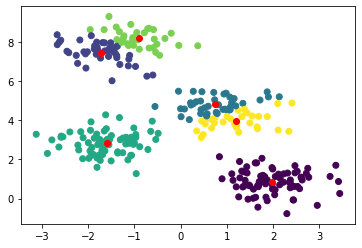

In [5]:
# cluster blobs with non-optimal value for k
model = KMeans(n_clusters=6)
model.fit(X)
labels = model.predict(X)


# plot clusters by color according to cluster model
plt.scatter(X[:,0], X[:,1], c=labels)

# plot centers
centers = model.cluster_centers_
plt.scatter(centers[:,0], centers[:,1], c='red')

plt.show()

Next we consider the case where we select k too small.  Here we select k to be the value 2. Notice how k-means starts to merge existing clusters.

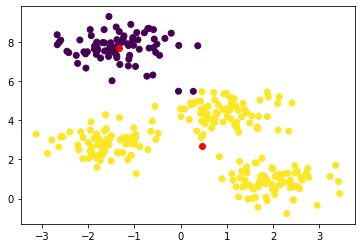

In [6]:
# cluster blobs with non-optimal value for k
model = KMeans(n_clusters=2)
model.fit(X)
labels = model.predict(X)


# plot clusters by color according to cluster model
plt.scatter(X[:,0], X[:,1], c=labels)

# plot centers
centers = model.cluster_centers_
plt.scatter(centers[:,0], centers[:,1], c='red')

plt.show()

We will use the Elbow method in order to determine the optimal value for k.

## The Elbow Method

Elbow Method – compute n different cluster models and 
compute the density within each cluster model – the crick of the elbow is where the density of the clusters  changes drastically.


In [7]:
# Source: http://www.slideshare.net/SarahGuido/kmeans-clustering-with-scikitlearn
def elbow(df, n):
    import matplotlib.pyplot as plt
    from sklearn.cluster import KMeans
    import numpy as np
    from scipy.spatial.distance import cdist, pdist
    
    # kmeans models for each k
    kMeansVar = [KMeans(n_clusters=k).fit(df.values) for k in range(1, n+1)]
    
    # get the centroids of the models
    centroids = [X.cluster_centers_ for X in kMeansVar]
    
    # find the distances of the values to the centroids
    k_euclid = [cdist(df.values, cent) for cent in centroids]
    
    # find the distance of each point to its cluster center
    dist = [np.min(ke, axis=1) for ke in k_euclid]
    
    # total within cluster sum of squares
    wcss = [sum(d**2) for d in dist]
    
    # total sum of squares
    tss = sum(pdist(df.values)**2)/df.values.shape[0]
    
    # between clusters sum of squares
    bss = tss - wcss
    
    # plot the variance of the models
    plt.plot(list(range(1,n+1)),bss)
    plt.show()

Illustrate this with some example clusters.

Number of clusters to generate: 3


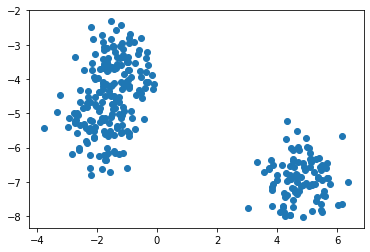

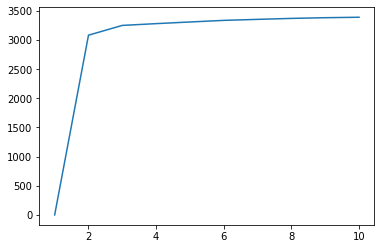

Number of clusters to model: 2


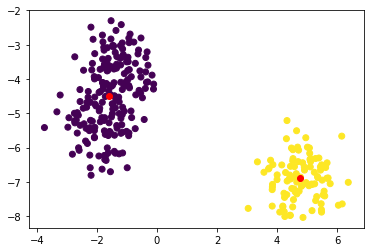

In [8]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.datasets import make_blobs

# generate the data
k = int(input("Number of clusters to generate: "))
X, y = make_blobs(n_samples=k*100, centers=k, cluster_std=0.60)

# plot clusters
plt.scatter(X[:,0], X[:,1]);
plt.show()

# generate elbow plot
elbow(pd.DataFrame(X),10)

# build model for the given k
k = int(input("Number of clusters to model: "))
model = KMeans(n_clusters=k)
model.fit(X)
labels = model.predict(X)

# plot clusters by color according to cluster model
plt.scatter(X[:,0], X[:,1], c=labels)

# plot centers
centers = model.cluster_centers_
plt.scatter(centers[:,0], centers[:,1], c='red')

plt.show()

## K-Means and non-convex Clusters

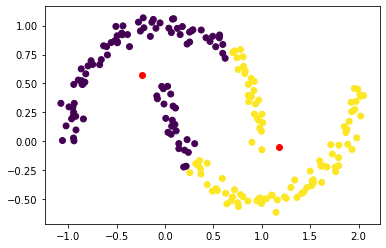

In [9]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_moons

# generate data
X, y = make_moons(200, noise=.05)

# fit model
model = KMeans(n_clusters=2)
model.fit(X)
labels = model.predict(X)


# plot clusters by color according to cluster model
plt.scatter(X[:,0], X[:,1], c=labels)

# plot centers
centers = model.cluster_centers_
plt.scatter(centers[:,0], centers[:,1], c='red')

plt.show()

## Example: Clustering Digits

The digits data set consists of 1,797 samples each consisting of an 8 × 8 grid of pixels (64 features) representing a handwritten digits between 0 and 9.

**Question**: can we use k-means to learn a representation of these digits that will summarize the roughly 1800 sample with 10 centroids -- each centroid representing a single digit?


In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.utils import shuffle
from sklearn.datasets import load_digits

### Training data

In [11]:
# Training data
digits = load_digits()
digits.data[:5,]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
        15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
        12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
         0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
        10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.],
       [ 0.,  0.,  0., 12., 13.,  5.,  0.,  0.,  0.,  0.,  0., 11., 16.,
         9.,  0.,  0.,  0.,  0.,  3., 15., 16.,  6.,  0.,  0.,  0.,  7.,
        15., 16., 16.,  2.,  0.,  0.,  0.,  0.,  1., 16., 16.,  3.,  0.,
         0.,  0.,  0.,  1., 16., 16.,  6.,  0.,  0.,  0.,  0.,  1., 16.,
        16.,  6.,  0.,  0.,  0.,  0.,  0., 11., 16., 10.,  0.,  0.],
       [ 0.,  0.,  0.,  4., 15., 12.,  0.,  0.,  0.,  0.,  3., 16., 15.,
        14.,  0.,  0.,  0.,  0.,  8., 13.,  8., 16.,  0.,  0.,  0.,  0.,
         1.,  6., 15., 11.,  0.,  0.,  0.,  1.,  8., 13., 15.,  1.,  0.,
         0.,  0.,  9., 16., 16.,  5.,  0.,  0.,  0.,  0.,  

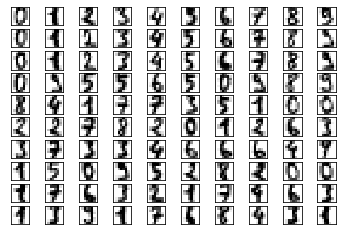

In [12]:
# show the first 100 digits from training data.
fig, ax = plt.subplots(10, 10)

sample = digits.data[:100].reshape(100, 8, 8)

for axi, d in zip(ax.flat, sample):
    axi.set(xticks=[], yticks=[])
    axi.imshow(d, cmap=plt.cm.binary)

### Model

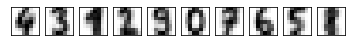

In [13]:
# build model
model = KMeans(n_clusters=10, random_state=0)
model.fit(digits.data)

# reshape centroids into 8x8 images
centers = model.cluster_centers_.reshape(10, 8, 8)

# print out centroids of model
fig, ax = plt.subplots(1, 10)
for axi, center in zip(ax.flat, centers):
    axi.set(xticks=[], yticks=[])
    axi.imshow(center, cmap=plt.cm.binary)

We can now use the model to do **character recognition**!

In [14]:
# translation table - depends on the fact that our model always
# produces the centroids in the same numerical order.
translation = [
    'four',
    'three',
    'one',
    'two',
    'nine',
    'zero',
    'seven',
    'six',
    'five',
    'eight',
    ]

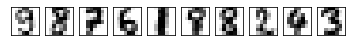

['nine',
 'three',
 'seven',
 'six',
 'eight',
 'seven',
 'nine',
 'two',
 'four',
 'three']

In [15]:
# grab some random digits
random_digits = shuffle(digits.data)[:10,]

# print the digits
fig, ax = plt.subplots(1, 10)
for axi, d in zip(ax.flat, random_digits.reshape(10, 8, 8)):
    axi.set(xticks=[], yticks=[])
    axi.imshow(d, cmap=plt.cm.binary)
plt.show()

# classify and translate the digits into strings
[translation[i] for i in model.predict(random_digits)]

# Example: Color Quantization using K-Means

In computer graphics, color quantization or color image quantization is a process that reduces the number of distinct colors used in an image, usually with the intention that the new image should be as visually similar as possible to the original image.

An example image in 24-bit RGB color:
![](https://upload.wikimedia.org/wikipedia/commons/e/e3/Dithering_example_undithered.png)

The same image reduced to a palette of 16 colors specifically chosen to best represent the image; the selected palette is shown by the squares,
![](https://upload.wikimedia.org/wikipedia/en/4/48/Dithering_example_undithered_16color_palette.png)

The palette is chosen using the k-means algorithm in RGB color space:
<img src="https://upload.wikimedia.org/wikipedia/commons/3/3d/Rosa_Gold_Glow_2_small_noblue_color_space.png" height="400" width="400">

(source: [Wikipedia](https://en.wikipedia.org/wiki/Color_quantization))

## China Temple Example

Performs a pixel-wise Vector Quantization (VQ) of an image of the summer palace
(China), reducing the number of colors required to show the image from 96,615
unique colors to 16, while preserving the overall appearance quality.

Based on the [quantization example from SKlearn](https://scikit-learn.org/stable/auto_examples/cluster/plot_color_quantization.html#sphx-glr-auto-examples-cluster-plot-color-quantization-py)

In [16]:
import numpy as np
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import load_sample_image
from sklearn.utils import shuffle

In [17]:
# number of colors to use for compression
n_colors = 16

### Image Data

In [18]:
# Load the Summer Palace photo
china = load_sample_image("china.jpg")
china.shape

(427, 640, 3)

In [19]:
china[:4,:4,]

array([[[174, 201, 231],
        [174, 201, 231],
        [174, 201, 231],
        [174, 201, 231]],

       [[172, 199, 229],
        [173, 200, 230],
        [173, 200, 230],
        [174, 201, 231]],

       [[174, 201, 231],
        [174, 201, 231],
        [174, 201, 231],
        [174, 201, 231]],

       [[175, 202, 232],
        [175, 202, 232],
        [175, 202, 232],
        [175, 202, 232]]], dtype=uint8)

In [20]:
# Convert to floats instead of the default 8 bits integer coding. Dividing by
# 255 is important so that plt.imshow behaves works well on float data (need to
# be in the range [0-1])
china = np.array(china, dtype=np.float64) / 255
china[:5,:5,]

array([[[0.68235294, 0.78823529, 0.90588235],
        [0.68235294, 0.78823529, 0.90588235],
        [0.68235294, 0.78823529, 0.90588235],
        [0.68235294, 0.78823529, 0.90588235],
        [0.68235294, 0.78823529, 0.90588235]],

       [[0.6745098 , 0.78039216, 0.89803922],
        [0.67843137, 0.78431373, 0.90196078],
        [0.67843137, 0.78431373, 0.90196078],
        [0.68235294, 0.78823529, 0.90588235],
        [0.68235294, 0.78823529, 0.90588235]],

       [[0.68235294, 0.78823529, 0.90588235],
        [0.68235294, 0.78823529, 0.90588235],
        [0.68235294, 0.78823529, 0.90588235],
        [0.68235294, 0.78823529, 0.90588235],
        [0.68235294, 0.78823529, 0.90588235]],

       [[0.68627451, 0.79215686, 0.90980392],
        [0.68627451, 0.79215686, 0.90980392],
        [0.68627451, 0.79215686, 0.90980392],
        [0.68627451, 0.79215686, 0.90980392],
        [0.68235294, 0.78823529, 0.90588235]],

       [[0.68235294, 0.78823529, 0.90196078],
        [0.68235294, 0.788

### Training Data

In [21]:
# transform to a 2D numpy array for training the k-means model

w, h, d = china.shape
assert d == 3

# the array is now a list of color values: list of points in RGB space.
image_array = np.reshape(china, (w * h, d))
image_array[:25,]

array([[0.68235294, 0.78823529, 0.90588235],
       [0.68235294, 0.78823529, 0.90588235],
       [0.68235294, 0.78823529, 0.90588235],
       [0.68235294, 0.78823529, 0.90588235],
       [0.68235294, 0.78823529, 0.90588235],
       [0.68235294, 0.78823529, 0.90588235],
       [0.68235294, 0.78823529, 0.90588235],
       [0.68235294, 0.78823529, 0.90588235],
       [0.67843137, 0.79215686, 0.90980392],
       [0.6745098 , 0.78823529, 0.90588235],
       [0.6745098 , 0.78823529, 0.90588235],
       [0.67843137, 0.79215686, 0.90980392],
       [0.6745098 , 0.78823529, 0.90588235],
       [0.6745098 , 0.78823529, 0.90588235],
       [0.6745098 , 0.78823529, 0.90588235],
       [0.68235294, 0.79607843, 0.91372549],
       [0.68627451, 0.8       , 0.91764706],
       [0.68235294, 0.79607843, 0.91372549],
       [0.67843137, 0.79215686, 0.90980392],
       [0.68235294, 0.79607843, 0.91372549],
       [0.69019608, 0.79607843, 0.91372549],
       [0.69019608, 0.79607843, 0.91372549],
       [0.

In [22]:
len(image_array)

273280

In [23]:
# Fitting k-means model on a 1% sub-sample of the data for speed reasons
image_array_sample = shuffle(image_array, random_state=0)[:len(image_array)//100]

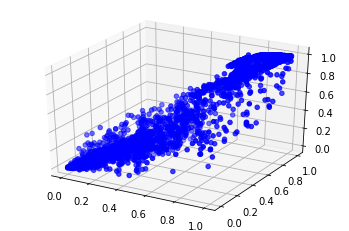

In [24]:
# plot the colors of training data - plot training RGB space
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(image_array_sample[:,0], image_array_sample[:,1], image_array_sample[:,2],c='blue');
plt.show()

### Model Building

In [25]:
# train the model with n_colors
model = KMeans(n_clusters=n_colors, random_state=0)
model.fit(image_array_sample)

# the cluster centers now represent the new colors
model.cluster_centers_

array([[0.86773732, 0.91192032, 0.96248988],
       [0.3289951 , 0.31394608, 0.16588235],
       [0.51364809, 0.51537668, 0.42033024],
       [0.05047174, 0.04689474, 0.02617114],
       [0.70903499, 0.74643086, 0.73915161],
       [0.94423671, 0.96107818, 0.98593505],
       [0.32655971, 0.35845082, 0.32419381],
       [0.21073906, 0.213273  , 0.15845148],
       [0.46649979, 0.42258379, 0.23662912],
       [0.80693316, 0.82606435, 0.84198895],
       [0.8467128 , 0.64832757, 0.48465975],
       [0.57021192, 0.6251535 , 0.61414141],
       [0.13808514, 0.11171171, 0.08597421],
       [0.38263305, 0.16442577, 0.11323529],
       [0.70839618, 0.41126194, 0.2927099 ],
       [0.75060142, 0.84013841, 0.94150601]])

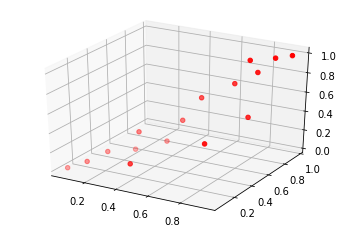

In [26]:
# plot the colors of the k-means model
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(model.cluster_centers_[:,0], model.cluster_centers_[:,1], model.cluster_centers_[:,2],c='red');
plt.show()

### Build Compressed Image

In [27]:
# map each pixel in the image into a color cluster
new_color_label_array = model.predict(image_array)
shuffle(new_color_label_array)[:32]

array([12,  3,  4,  6,  3,  5,  2, 12,  5,  5,  9,  0,  0,  8,  4,  0,  3,
        0,  8,  2,  3,  9,  9,  0, 15,  2,  9,  5,  4, 14,  3,  0],
      dtype=int32)

In [28]:
# create a new image array based on the new colors
new_image_array = np.zeros((w*h,d))
for i in range(w*h):
    new_image_array[i] = model.cluster_centers_[new_color_label_array[i]]

# reshape the new image array into a new image with the same dimensions as the original image.
new_image = np.reshape(new_image_array,(w,h,d))

### Image Comparison

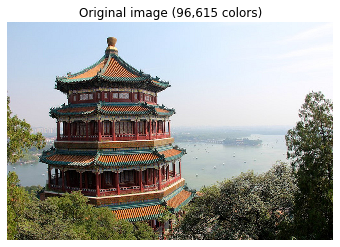

In [29]:
# original image
plt.clf()
plt.axis('off')
plt.title('Original image (96,615 colors)')
plt.imshow(china)
plt.show()

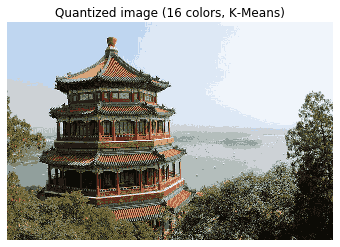

In [30]:
# quantized image
plt.clf()
plt.axis('off')
plt.title('Quantized image ({} colors, K-Means)'.format(n_colors))
plt.imshow(new_image)
plt.show()

# Final Project Proposal

The final project could be a (team) app (e.g. Python script that implements some non-trivial functionality with/without visualization or an app built on your favorite platform) or it can be an individual analysis project. 

Details in Sakai.
